# Task 4: Cricket Player Performance Prediction using Machine Learning

In [2]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from subprocess import check_output
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [3]:
df = pd.read_csv('ODI_Match_Results.csv')

In [4]:
df

,Unnamed: 0,Result,Margin,BR,Toss,Bat,Opposition,Ground,Start Date,Match_ID,Country,Country_ID
0,418,won,85 runs,NaN,lost,1st,v India,Kolkata,3 Jan 2013,ODI # 3315,Pakistan,7
1,692,lost,85 runs,NaN,won,2nd,v Pakistan,Kolkata,3 Jan 2013,ODI # 3315,India,6
2,419,lost,10 runs,NaN,lost,2nd,v India,Delhi,6 Jan 2013,ODI # 3316,Pakistan,7
3,693,won,10 runs,NaN,won,1st,v Pakistan,Delhi,6 Jan 2013,ODI # 3316,India,6
4,121,lost,107 runs,NaN,lost,2nd,v Australia,Melbourne,11 Jan 2013,ODI # 3317,SriLanka,8
...,...,...,...,...,...,...,...,...,...,...,...,...
1317,997,won,3 wickets,3.0,won,2nd,v Pakistan,Nottingham,17 May 2019,ODI # 4138,England,1
1318,282,aban,-,NaN,-,-,v Scotland,Edinburgh,18 May 2019,ODI # 4138a,SriLanka,8
1319,1322,-,-,NaN,won,2nd,v Ireland,Belfast,19 May 2019,ODI # 4139,Afghanistan,40
1320,559,-,-,NaN,lost,2nd,v England,Leeds,19 May 2019,ODI # 4140,Pakistan,7


In [5]:
df.isnull().sum()

Unnamed: 0      0
Result          0
Margin          0
BR            716
Toss            0
Bat             0
Opposition      0
Ground          0
Start Date      0
Match_ID        0
Country         0
Country_ID      0
dtype: int64

In [6]:
df= df.dropna()

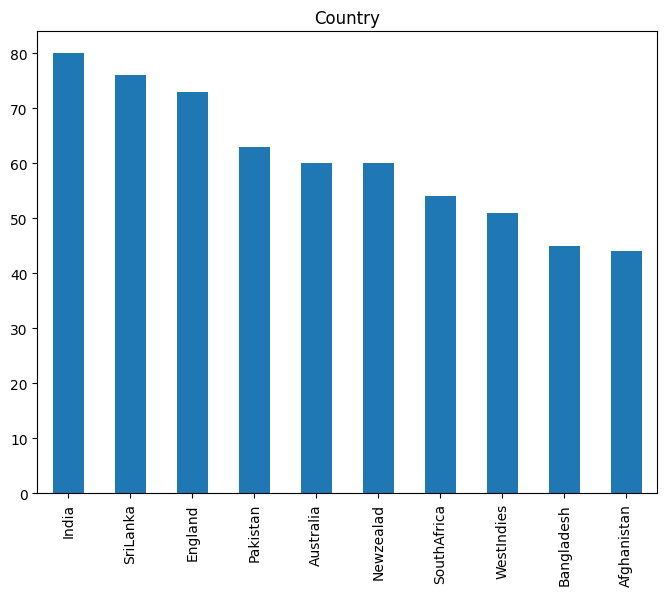

In [7]:
df.Country.value_counts().plot(kind='bar', title='Country' ,figsize=(8,6))
plt.show()

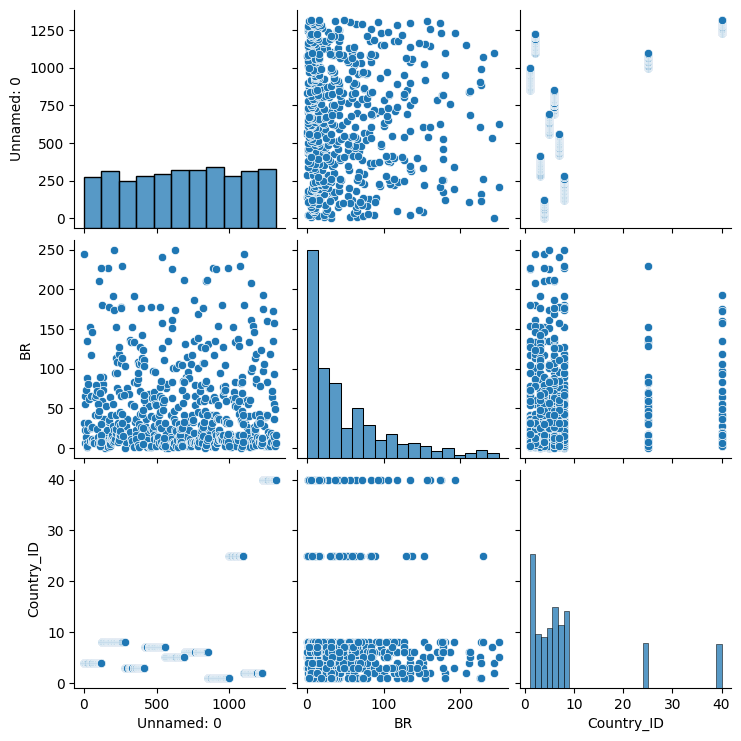

In [8]:
sns.pairplot(df)

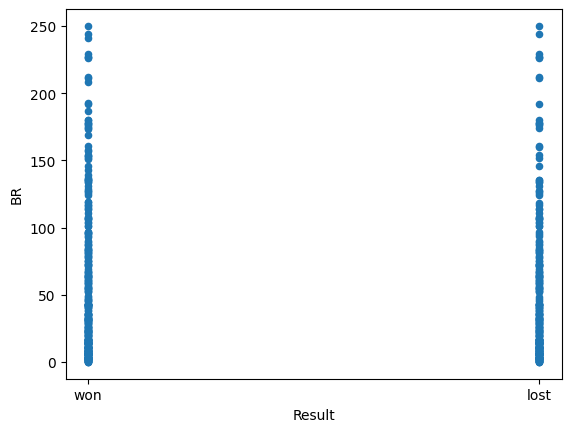

In [9]:
df.plot(kind='scatter', x='Result', y='BR')
plt.show()

In [11]:
X = df.loc[:,['Margin','Toss','Bat','Opposition','Ground','Country']]
Y = df['Result']

In [13]:
labelencoder_X = LabelEncoder()
onehotencoder = OneHotEncoder()
X = onehotencoder.fit_transform(X).toarray()
labelencoder_y = LabelEncoder()
Y = labelencoder_y.fit_transform(Y)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)


In [14]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [15]:
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [17]:
Y_pred = classifier.predict(X_test)
Y_pred

array([0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1])

In [19]:
cm = confusion_matrix(Y_test, Y_pred)
Y_test
print(cm)

[[75  0]
 [ 0 77]]
